In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re                        
import tweepy 
import csv
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [2]:
consumerkey='cx83ZljBHab3bnBjVnG1FBDzf'
consumersecret='ryDeUWIa3CQGoszANUOVT2l7k8POr2GzkppRoWpeNY7umZfh3s'
accesstoken='857240278268116993-8UfQlpN2xuES6BPUAJ5wFeibKAYdtie'
accesstokensecret='g9hLnhv2VK7vdYgVQBnaACKIf5WRjTg0UjcymNxrmziy8'

In [7]:
authenticate=tweepy.OAuthHandler(consumerkey,consumersecret)
## set access token and access token secret
authenticate.set_access_token(accesstoken, accesstokensecret)
## create API object while passing in authentication information
api=tweepy.API(authenticate, wait_on_rate_limit=True)

In [8]:
# Baris dibawah digunakan untuk membuat file "tokopedia.csv" yang nantinya akan digunakan
# untuk menampung tweet yang telah dicrawl
csvFile = open('tokopedia.csv', 'a', encoding= 'utf-8')
csvWriter = csv.writer(csvFile)

# Kolom yang dibuat ke dalam tabel tweet.csv
csvWriter.writerow(['timestamp', 'tweet_text', 'username', 'all_hashtags', 'location', 
                    'followers_count', 'retweet_count', 'favorite_count'])

# Kode ini digunakan untuk melakukan proses crawling data
# q = berisi kueri kata pencarian, saya menggunakan kata "IKN"
# -filter = memfilter retweet untuk menghindari tweet yang sama
# lang = id, karena saya ingin mengambil tweet dalam bahasa indonesia saja
# tweet_mode = extended, karena saya ingin meliat tweet secara versi penuh
# items = 1000, jumlah tweet yang akan di crawl
for tweet in tweepy.Cursor(api.search_tweets, q="tokopedia"+' -filter:retweets', lang="id", tweet_mode='extended').items(1000):
            csvWriter.writerow([tweet.created_at, 
                        tweet.full_text.replace('\n',' ').encode('utf-8'), 
                        tweet.user.screen_name.encode('utf-8'), 
                        [e['text'] for e in tweet._json['entities']['hashtags']],  
                        tweet.user.location, 
                        tweet.user.followers_count, 
                        tweet.retweet_count, 
                        tweet.favorite_count])


In [8]:
# Baris dibawah digunakan untuk membuat file "tokopedia.csv" yang nantinya akan digunakan
# untuk menampung tweet yang telah dicrawl
csvFile = open('shopee.csv', 'a', encoding= 'utf-8')
csvWriter = csv.writer(csvFile)

# Kolom yang dibuat ke dalam tabel tweet.csv
csvWriter.writerow(['timestamp', 'tweet_text', 'username', 'all_hashtags', 'location', 
                    'followers_count', 'retweet_count', 'favorite_count'])

# Kode ini digunakan untuk melakukan proses crawling data
# q = berisi kueri kata pencarian, saya menggunakan kata "IKN"
# -filter = memfilter retweet untuk menghindari tweet yang sama
# lang = id, karena saya ingin mengambil tweet dalam bahasa indonesia saja
# tweet_mode = extended, karena saya ingin meliat tweet secara versi penuh
# items = 1000, jumlah tweet yang akan di crawl
for tweet in tweepy.Cursor(api.search_tweets, q="shopee"+' -filter:retweets', lang="id", tweet_mode='extended').items(1000):
            csvWriter.writerow([tweet.created_at, 
                        tweet.full_text.replace('\n',' ').encode('utf-8'), 
                        tweet.user.screen_name.encode('utf-8'), 
                        [e['text'] for e in tweet._json['entities']['hashtags']],  
                        tweet.user.location, 
                        tweet.user.followers_count, 
                        tweet.retweet_count, 
                        tweet.favorite_count])

In [2]:
from io import StringIO

# Read the csv file into a StringIO object
sio = StringIO()
with open('tokopedia.csv', 'r', encoding='unicode-escape') as f:
    for line in f:
        line = line.encode('latin1').decode('utf8')
        sio.write(line)
sio.seek(0)    # Reset file pointer to the beginning

# Call read_csv, passing the StringIO object
df_toped = pd.read_csv(sio, encoding="utf8", usecols = ["tweet_text"])

In [3]:
print(df_toped)

                                             tweet_text
0                                            tweet_text
1                                            tweet_text
2     b'Via Tokopedia, Promo Gratis Ongkir 1. Origin...
3     b'Nama Meja Bank BRI stainless berholder alumi...
4     b'Merah merona ready langsung ae order gas!  S...
...                                                 ...
997   b'Coba cek ini,deh: "Xiaomi Official Redmi Not...
998   b'Coba cek ini, deh: "Xiaomi Official Redmi No...
999   b'Plat Jam Operasional Bank BRI stainless 35x2...
1000  b'@tokopedia @TokopediaCare Wishlist aku di ta...
1001  b'@tokopedia @TokopediaCare Wishlist aku di ta...

[1002 rows x 1 columns]


In [4]:
from io import StringIO

# Read the csv file into a StringIO object
sio = StringIO()
with open('shopee.csv', 'r', encoding='unicode-escape') as f:
    for line in f:
        line = line.encode('latin1').decode('utf8')
        sio.write(line)
sio.seek(0)    # Reset file pointer to the beginning

# Call read_csv, passing the StringIO object
df_shopee = pd.read_csv(sio, encoding="utf8", usecols = ["tweet_text"])

In [5]:
print(df_shopee)

                                             tweet_text
0                                            tweet_text
1     b'Yuk Order Produknya, Hanya di Shopee, Lagi a...
2                               b'Wkwkwkw shopee error'
3                            b'Shopee emg lg error ya?'
4     b'@kegblgnunfaedh Ekspresi mukanya udh mencerm...
...                                                 ...
1170  b'@ShopeeID @Shopee_id B #RedmiA1dariShopee  S...
1171  b'Saya menjual airin wallet jimshoney seharga ...
1172                 b'shopee dari tadi error mulu dih'
1173  b'hai guys! aku open PO poster kain custom gin...
1174  b'@ciloqciliq pengen jadi orang kaya  1. https...

[1175 rows x 1 columns]


In [8]:
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) ## removing @ mention
    text=re.sub(r'#','',text)             ## removing # symbol
    text=re.sub(r"b'",'',text)             ## removing b' char
    text=re.sub(r"'",'',text)             ## removing ' char
    text=re.sub(r'RT[\s]+','',text)  ## removing RT followed byspace
 
  #df=df[~df.Tweets.str.contains('RT')] --> another way to remove RT
    text=re.sub(r'https?:\/\/\S+','',text) ## removing https
    return text
df_toped['tweet_text']=df_toped['tweet_text'].apply(cleanTxt)   ## applying function
df_shopee['tweet_text']=df_shopee['tweet_text'].apply(cleanTxt)   ## applying function
## clean Text
df_toped, df_shopee

(                                             tweet_text
 0                                            tweet_text
 1                                            tweet_text
 2     Via Tokopedia, Promo Gratis Ongkir 1. Original...
 3     Nama Meja Bank BRI stainless berholder alumini...
 4     Merah merona ready langsung ae order gas!  Sho...
 ...                                                 ...
 997   Coba cek ini,deh: "Xiaomi Official Redmi Note ...
 998   Coba cek ini, deh: "Xiaomi Official Redmi Note...
 999   Plat Jam Operasional Bank BRI stainless 35x20c...
 1000    Wishlist aku di tahun 2023 pengen beliin hp ...
 1001    Wishlist aku di tahun 2023 pengen beliin hp ...
 
 [1002 rows x 1 columns],
                                              tweet_text
 0                                            tweet_text
 1     Yuk Order Produknya, Hanya di Shopee, Lagi ada...
 2                                  Wkwkwkw shopee error
 3                               Shopee emg lg error ya?
 4 

In [9]:
## create function to subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
## create function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
## create two new column
df_toped['Subjectivity']=df_toped['tweet_text'].apply(getSubjectivity)
df_toped['Polarity']=df_toped['tweet_text'].apply(getPolarity)
## create two new column
df_shopee['Subjectivity']=df_shopee['tweet_text'].apply(getSubjectivity)
df_shopee['Polarity']=df_shopee['tweet_text'].apply(getPolarity)
## show new Dataframe
df_toped, df_shopee

(                                             tweet_text  Subjectivity  \
 0                                            tweet_text          0.00   
 1                                            tweet_text          0.00   
 2     Via Tokopedia, Promo Gratis Ongkir 1. Original...          0.75   
 3     Nama Meja Bank BRI stainless berholder alumini...          0.20   
 4     Merah merona ready langsung ae order gas!  Sho...          0.50   
 ...                                                 ...           ...   
 997   Coba cek ini,deh: "Xiaomi Official Redmi Note ...          0.10   
 998   Coba cek ini, deh: "Xiaomi Official Redmi Note...          0.10   
 999   Plat Jam Operasional Bank BRI stainless 35x20c...          0.20   
 1000    Wishlist aku di tahun 2023 pengen beliin hp ...          0.00   
 1001    Wishlist aku di tahun 2023 pengen beliin hp ...          0.00   
 
       Polarity  
 0        0.000  
 1        0.000  
 2        0.375  
 3        0.200  
 4        0.250  
 .

In [10]:
## create function to compute positive, negative and neutral analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
df_toped['Analysis'] = df_toped['Polarity'].apply(getAnalysis)
df_shopee['Analysis'] = df_shopee['Polarity'].apply(getAnalysis)
print(df_toped, df_shopee)

                                             tweet_text  Subjectivity  \
0                                            tweet_text          0.00   
1                                            tweet_text          0.00   
2     Via Tokopedia, Promo Gratis Ongkir 1. Original...          0.75   
3     Nama Meja Bank BRI stainless berholder alumini...          0.20   
4     Merah merona ready langsung ae order gas!  Sho...          0.50   
...                                                 ...           ...   
997   Coba cek ini,deh: "Xiaomi Official Redmi Note ...          0.10   
998   Coba cek ini, deh: "Xiaomi Official Redmi Note...          0.10   
999   Plat Jam Operasional Bank BRI stainless 35x20c...          0.20   
1000    Wishlist aku di tahun 2023 pengen beliin hp ...          0.00   
1001    Wishlist aku di tahun 2023 pengen beliin hp ...          0.00   

      Polarity  Analysis  
0        0.000   Neutral  
1        0.000   Neutral  
2        0.375  Positive  
3        0.200 

In [16]:
## negative Tweets in dataframe
df2 = df_toped.groupby('Analysis')
df2 = df_shopee.groupby('Analysis')
df2.get_group('Negative')
## positive Tweets in Dataframe
df_toped[df_toped.Analysis=='Positive']   ## Another way of indexing
df_shopee[df_shopee.Analysis=='Positive']   ## Another way of indexing

,tweet_text,Subjectivity,Polarity,Analysis
13,"hai ka aku ready 13pcs masih sealed , 30k/eac...",0.500000,0.200000,Positive
17,FUHH jumpa pulak pocket size APEMAN ni. murah ...,1.000000,0.600000,Positive
19,"Dahla cantik, ringan, ada 10 filter lagii! Sia...",0.400000,0.195312,Positive
24,"jb yuk angkut skincare underpricenya, new dan ...",0.602273,0.255682,Positive
36,Merah merona ready langsung ae order gas! Sho...,0.500000,0.250000,Positive
...,...,...,...,...
1110,mimin sarankan kamu untuk lakukan Clear Cache...,0.383333,0.100000,Positive
1129,NOERA THE PERFECT SHIELD SUNSCREEN SPF 50 PA++...,1.000000,1.000000,Positive
1135,Mimin sarankan untuk melakukan Clear Cache da...,0.383333,0.100000,Positive
1149,WTS PHOTOCARD YUNA SELCA ULTRAMILK 20K AJA ✅KE...,0.500000,0.500000,Positive


In [17]:
## print all positive tweets
j=1
sortedDF = df_toped.sort_values(by=['Polarity'])
sortedDF = df_shopee.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):       
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j)+')'+sortedDF['tweet_text'][i])
        print()
        j=j+1

1) hai ka aku ready 13pcs masih sealed , 30k/each dom bekasi bisa shopee or cod ambil bnyk bs nego

2)FUHH jumpa pulak pocket size APEMAN ni. murah lagi wehh. siap boleh jadi power bank lagi. Bawak pi camping ni nice gak kan?   

3)Dahla cantik, ringan, ada 10 filter lagii! Siap boleh transfer photo ke phone terus wehhh. loveeeee!! 🥺🤍👏  Wehhh, lagi murah kalau beli direct seller Japan!!! take my moneyyy😂💸   

4)jb yuk angkut skincare underpricenya, new dan original 🤩 via shopee dan tokped 

5)Merah merona ready langsung ae order gas!  Shopee:  Tokped:  

6)b" _id Maaf min aku ga percaya dengan giveaway ginian😥 5 thn lebih main Shopee ga Pernah Kasih hadiah... Swmoga Saja km tidak php Sama ke yg lain yah.."

7)Tgkla weh harga offer :   Pergi serbu cepat, Available dekat semua store smpai 26 December !! 

8)Tiktok shop paling the best saat ini sih, shopee lewat~ semurah itu darlenggg

9)Suka bingung kalau belanja skincare-makeup selain official store yg original &amp; harganya oke.   Aku

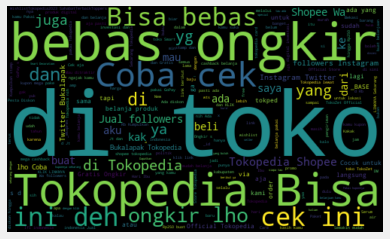

In [19]:
## plot word Cloud
allWords=' '.join([twts for twts in df_toped['tweet_text']])
wordCloud=WordCloud(width=500,height=300,random_state=10,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear' )
plt.axis('off')
plt.show()

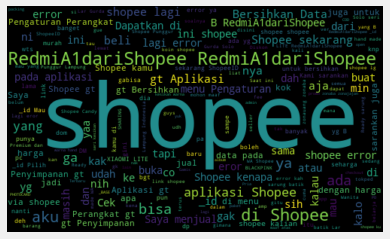

In [20]:
## plot word Cloud
allWords=' '.join([twts for twts in df_shopee['tweet_text']])
wordCloud=WordCloud(width=500,height=300,random_state=10,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear' )
plt.axis('off')
plt.show()

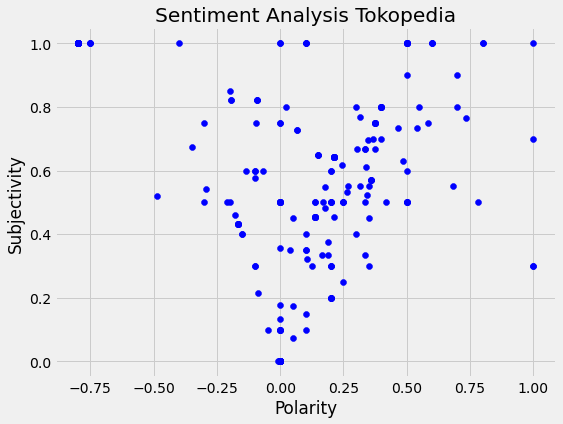

In [23]:
## plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df_toped.shape[0]):
    plt.scatter(df_toped['Polarity'][i],df_toped['Subjectivity'] 
    [i],color='Blue')
plt.title('Sentiment Analysis Tokopedia')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

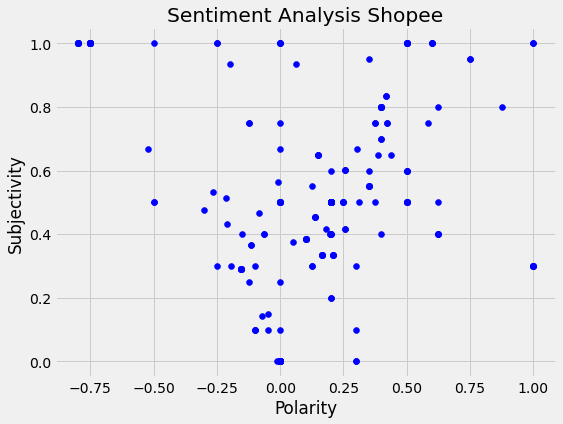

In [24]:
## plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df_shopee.shape[0]):
    plt.scatter(df_shopee['Polarity'][i],df_shopee['Subjectivity'] 
    [i],color='Blue')
plt.title('Sentiment Analysis Shopee')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

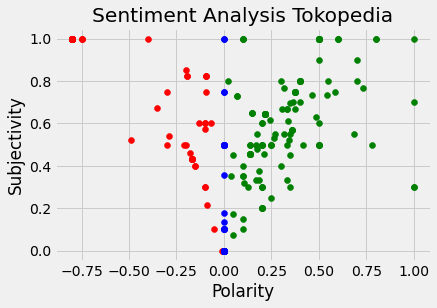

In [25]:
for index,row in df_toped.iterrows():
    if row['Analysis']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Analysis']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    else:
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
plt.title('Sentiment Analysis Tokopedia')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

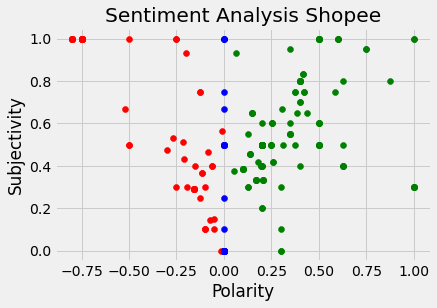

In [27]:
for index,row in df_shopee.iterrows():
    if row['Analysis']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Analysis']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    else:
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
plt.title('Sentiment Analysis Shopee')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

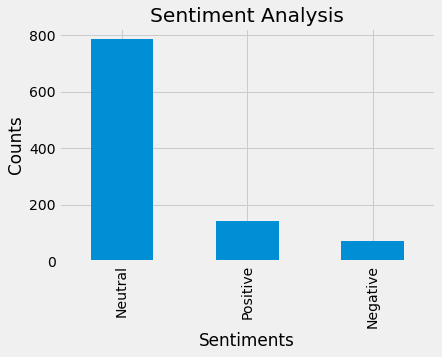

In [29]:
ptweets=df_toped[df_toped.Analysis=='Positive']
ptweets=ptweets['tweet_text']
round((ptweets.shape[0]/df_toped.shape[0])*100,1)
## get percentage of negative tweets
ntweets=df_toped[df_toped.Analysis=='Negative']
round((ntweets.shape[0]/df_toped.shape[0])*100,1)
## show value counts
df_toped['Analysis'].value_counts()
## plot visulatisation of count
plt.title('Sentiment Analysis Tokopedia')
plt.xlabel('Sentiments') 
plt.ylabel('Counts')
df_toped['Analysis'].value_counts().plot(kind='bar')
plt.show()

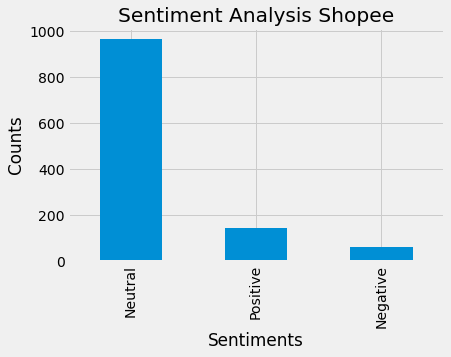

In [31]:
ptweets=df_shopee[df_shopee.Analysis=='Positive']
ptweets=ptweets['tweet_text']
round((ptweets.shape[0]/df_shopee.shape[0])*100,1)
## get percentage of negative tweets
ntweets=df_shopee[df_shopee.Analysis=='Negative']
round((ntweets.shape[0]/df_shopee.shape[0])*100,1)
## show value counts
df_shopee['Analysis'].value_counts()
## plot visulatisation of count
plt.title('Sentiment Analysis Shopee')
plt.xlabel('Sentiments') 
plt.ylabel('Counts')
df_shopee['Analysis'].value_counts().plot(kind='bar')
plt.show()